# Lecture-08 Thin Films-2
* author : Wei-Kai Lee
* Data : 2019/02/23

In [1]:
# python module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# optics module
from optics.TransferMatrix import cal_r_tau_from_structure, cal_field_z, plot_fun, cal_field_z_2
from optics.RTA import cal_TRA_from_structure
from optics.PlaneWave import cal_s, cal_p

In our previous lecture, although we derive the general form of transfer matrix of the stacking layered structure, we only consider the case of one interface between two materials. Hence, in the lecture, we are going dicuss the multi-layer case.

<img src="Lecture-8-Material/Fig-5.jpg" width= 400>
$$Fig. 5.$$

In [3]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.0, 1.5, 1.0], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 10, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-185, 185)

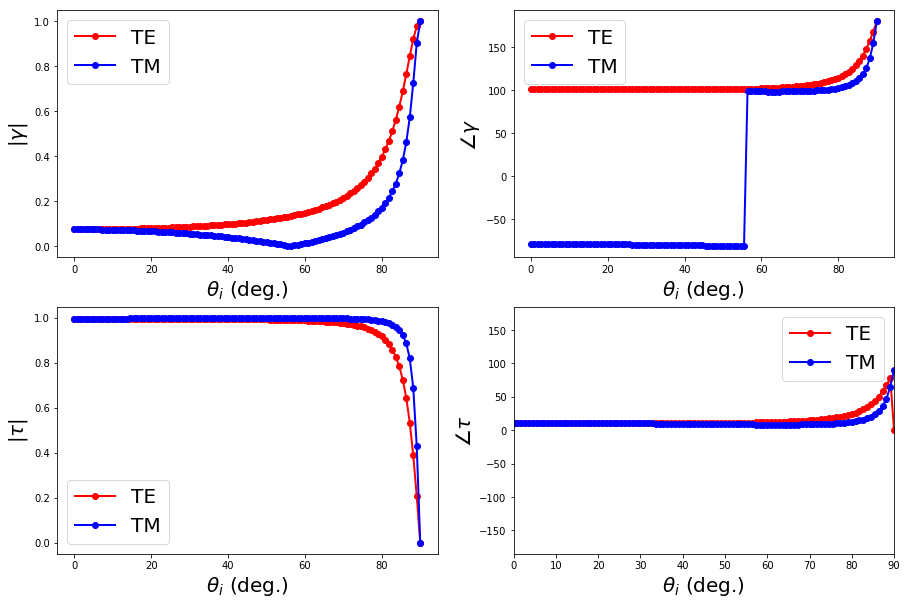

In [5]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

In [6]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-10, 110)

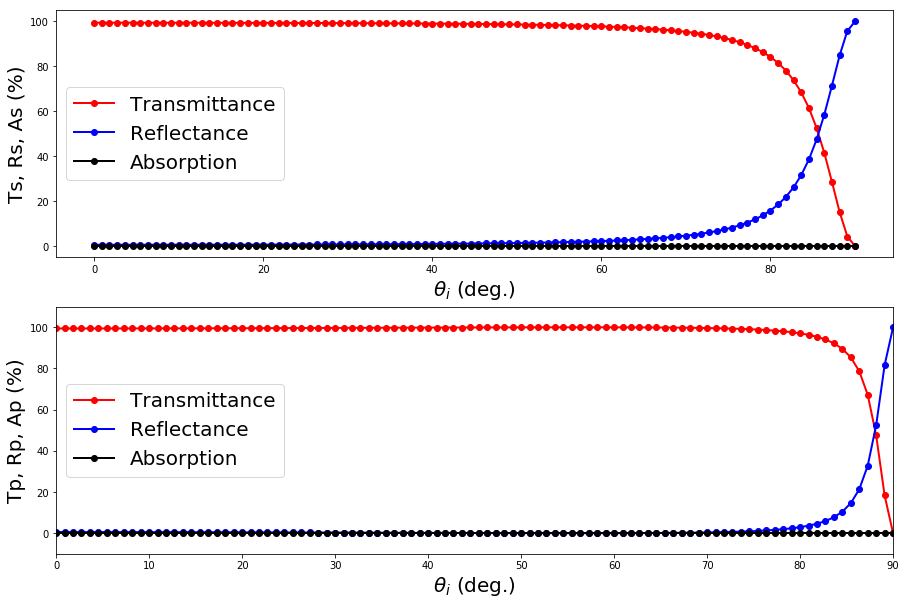

In [7]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

In **Lecture 8-1**, because the thickness of the middle material is small, the wave hardly perceive it. 

In [8]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 100, 200)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

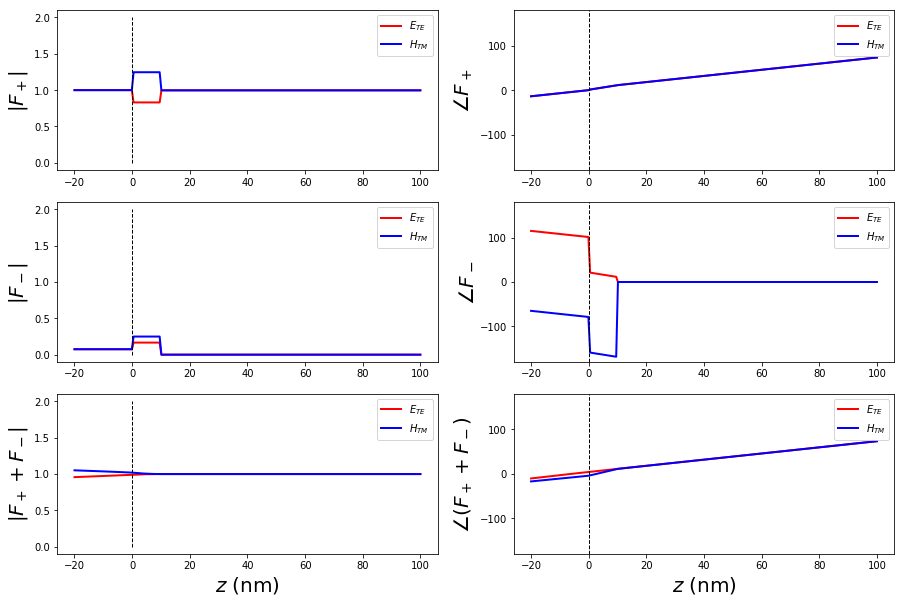

In [9]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

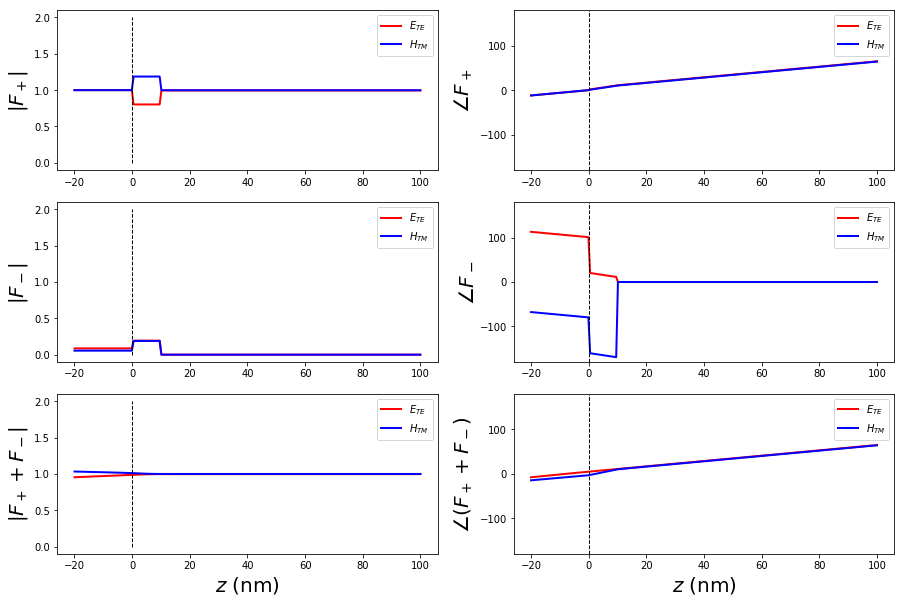

In [10]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

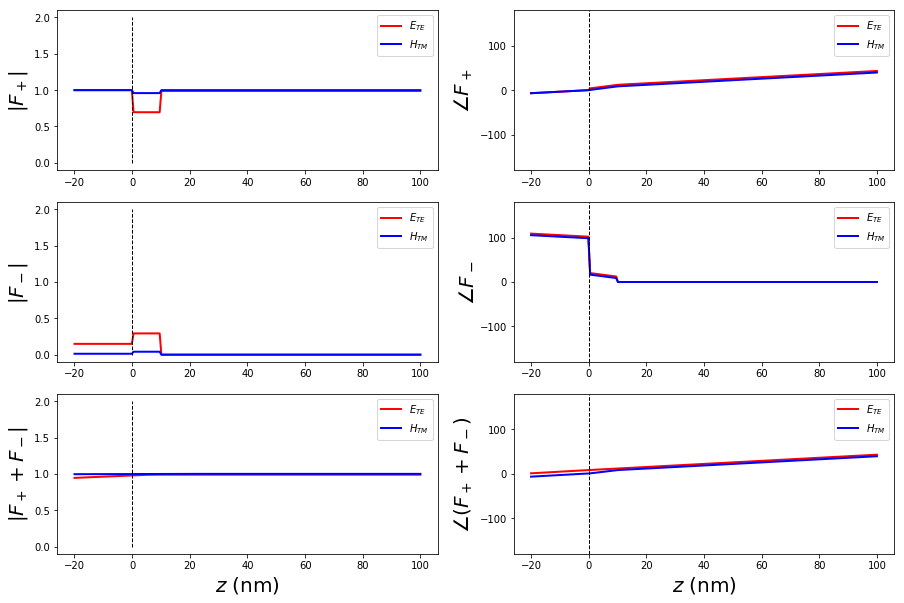

In [11]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)

<img src="Lecture-8-Material/Fig-6.jpg" width= 400>
$$Fig. 6.$$

In [12]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.0, 1.5, 1.0], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 50, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-185, 185)

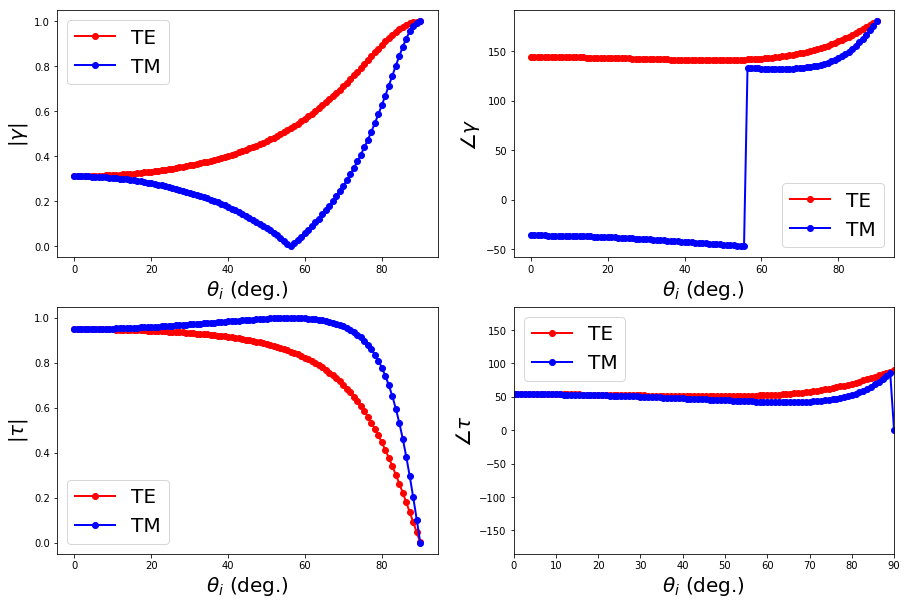

In [13]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

In [14]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-10, 110)

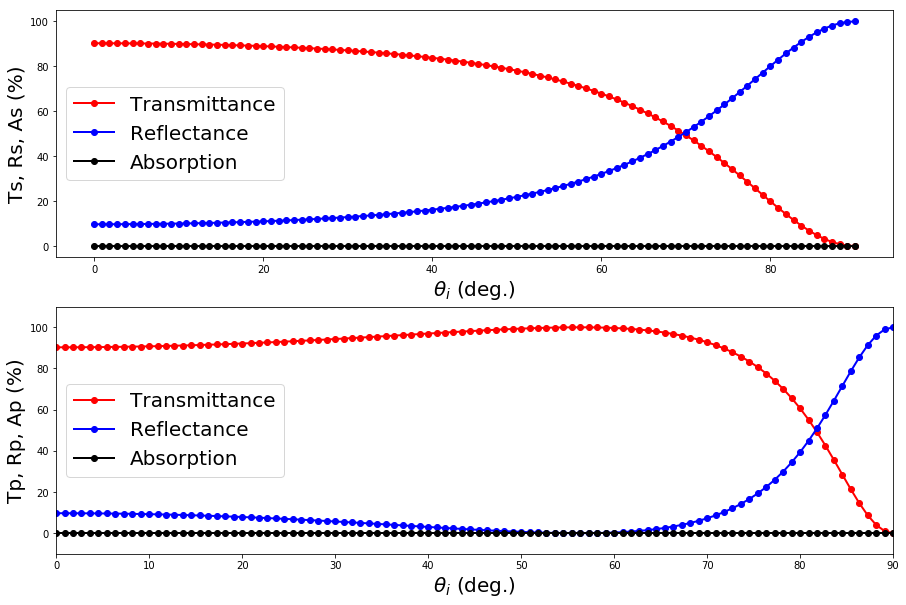

In [15]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

When increasing the thickness of the air to 50 nm, the reflection coefficient and the refectance becomes larger.Besides, the reflectance start increasing or the transmittance start decreasing when $\theta_i$ is small, indicating the air cannot be neglected anymore.

In [16]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 100, 200)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

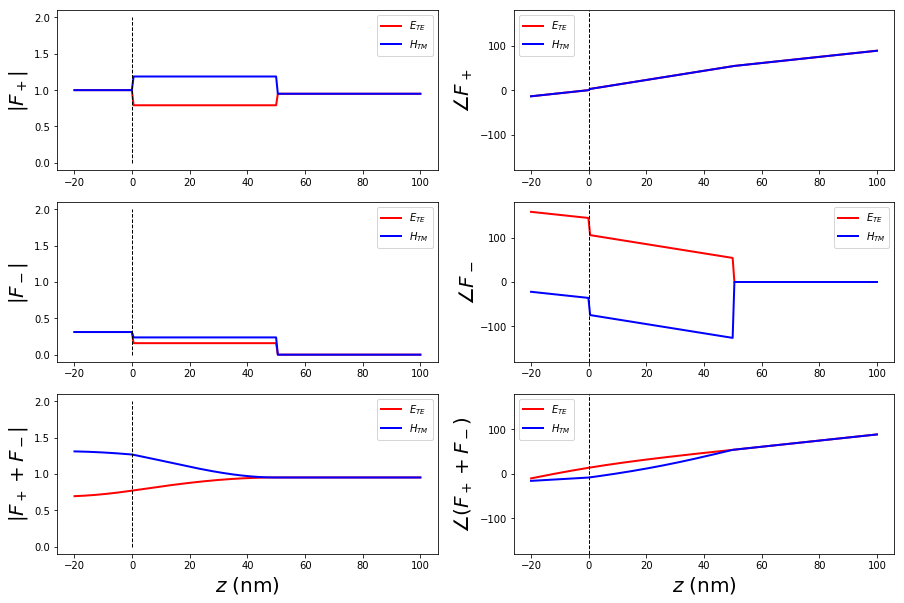

In [17]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

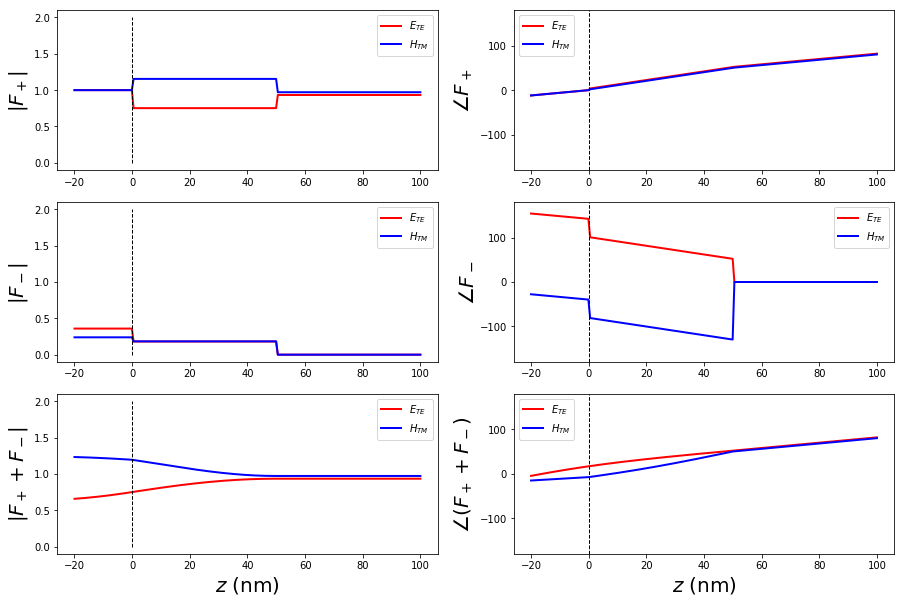

In [18]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

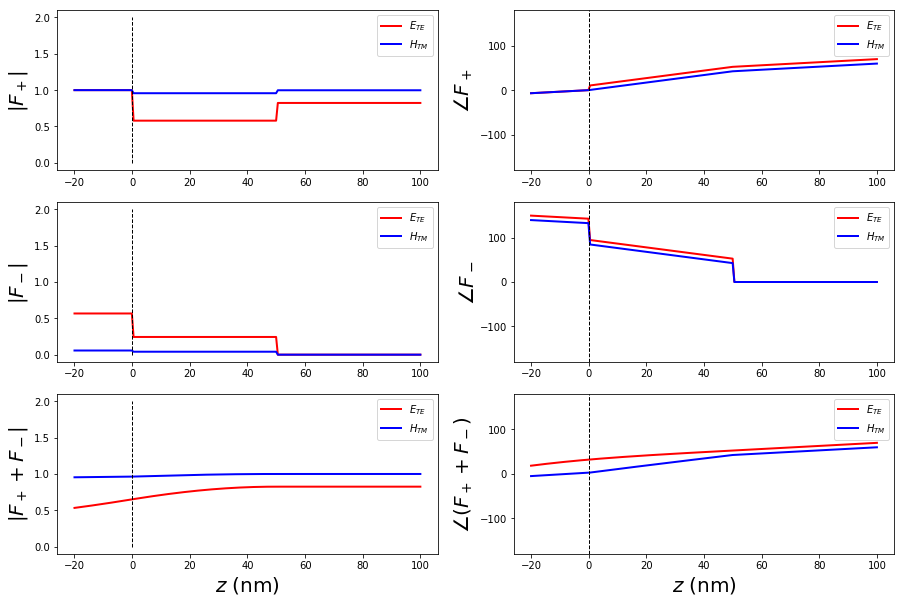

In [19]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)

<img src="Lecture-8-Material/Fig-7.jpg" width= 400>
$$Fig. 7.$$

In [20]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.0, 1.5, 1.0], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 100, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-185, 185)

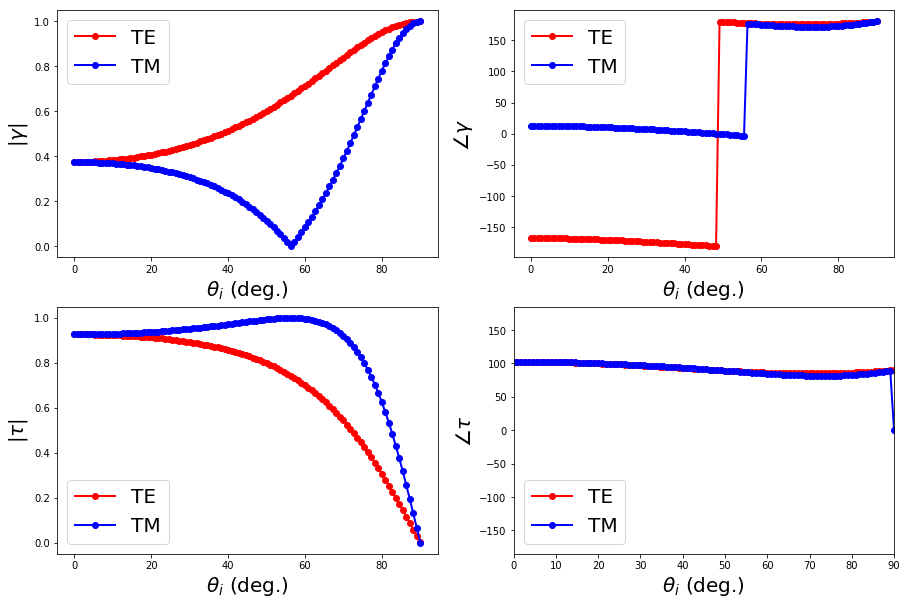

In [21]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

In [22]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-10, 110)

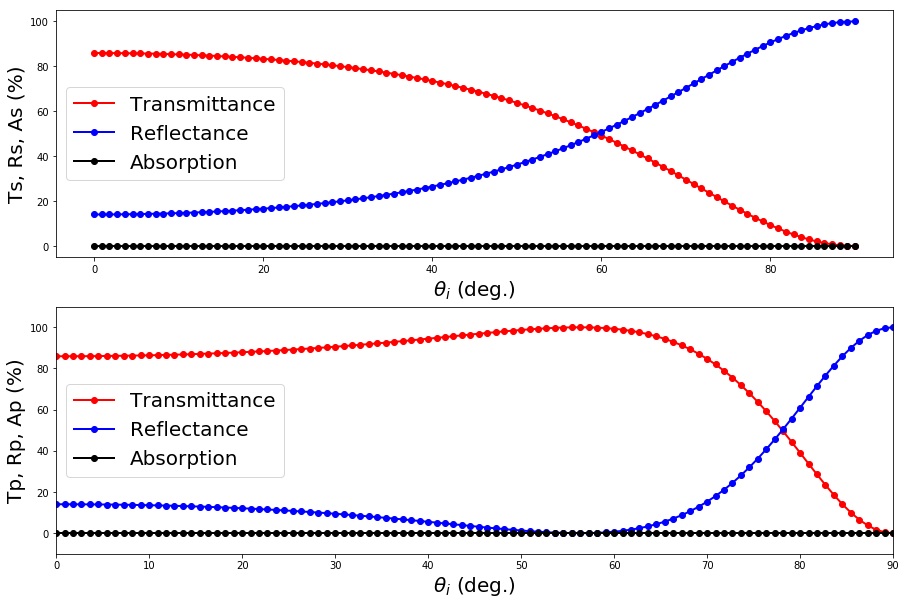

In [23]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

In [24]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 200, 400)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

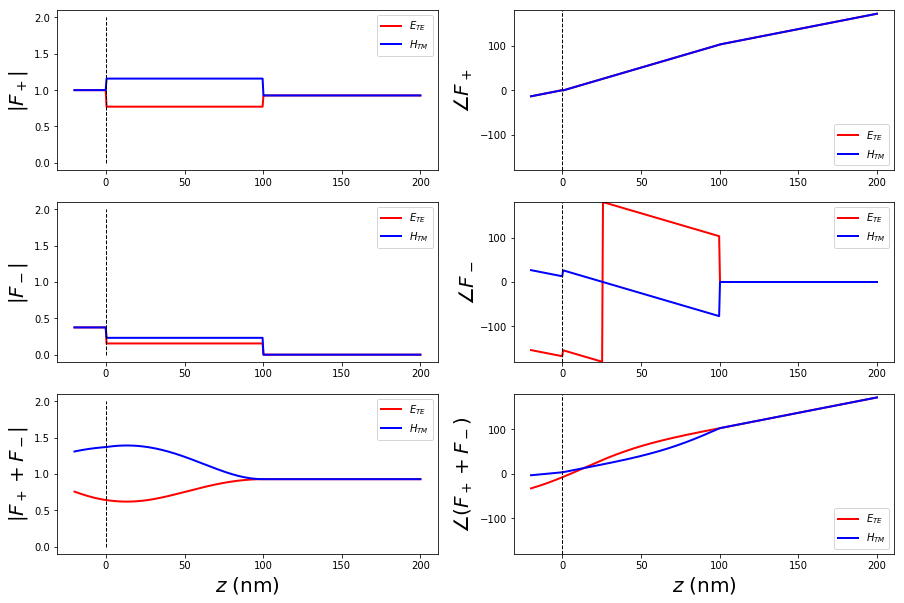

In [25]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

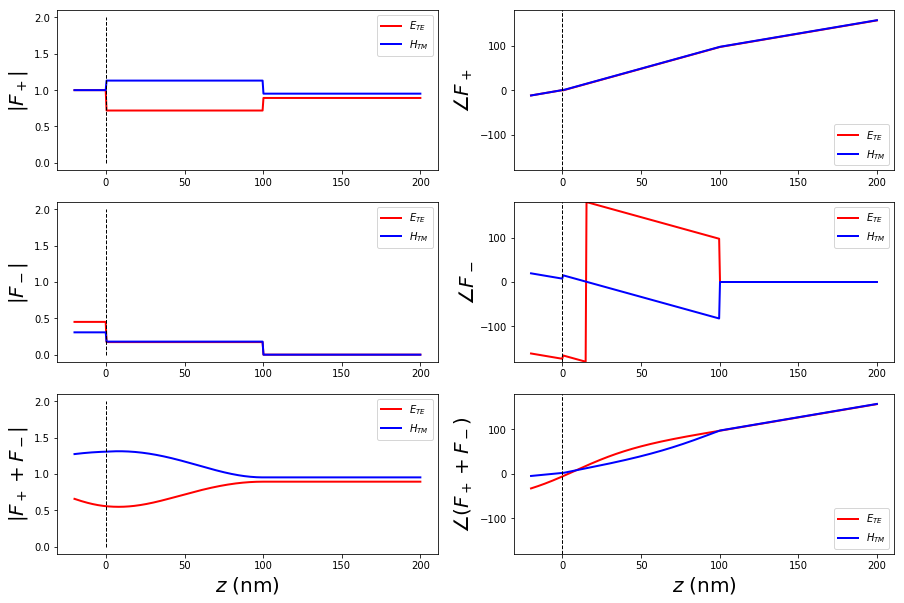

In [26]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

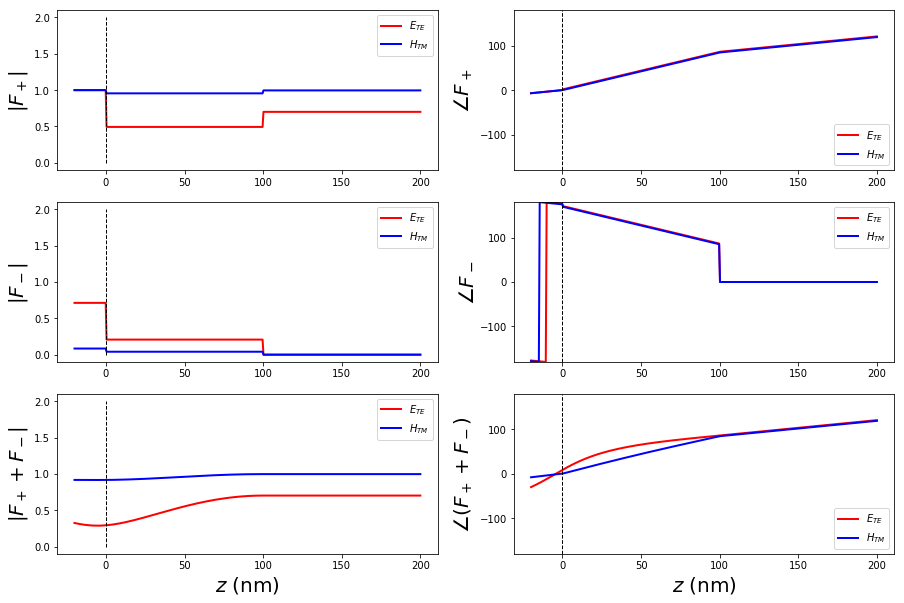

In [27]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)

Because the air become thicker, the +z evanescent wave would decay to a lower value compared to the thinner air thickness and hence the magnitude of the reflected -z evanescent wave would also become smaller compared to the previous structure. And it is obvious in the figure of reflection coefficient. When $\theta_i$ is large, the magnitude of the reflection coefficient is much closing 1.0, showing that the EM wave perform more like the totally internal reflection (TIR).

<img src="Lecture-8-Material/Fig-8.jpg" width= 400>
$$Fig. 8.$$

In [28]:
# constants
e0, mu0 = 1.0, 1.0
c = 1/np.sqrt(e0*mu0)

# input structure and parameters
n_array = np.array( [1.0, 1.5, 1.0], dtype = np.complex )
theta1 = np.linspace( 0, np.pi/2 , 100)
wavelength = 520
thickness_list = [0, 520, 0]

# input parameters process
ko = 2*np.pi/wavelength
w = c * ko

# from angle to wave number
k1 = n_array[0]*ko
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )

# calculation by transfer matrix
er_list = n_array**2
tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-185, 185)

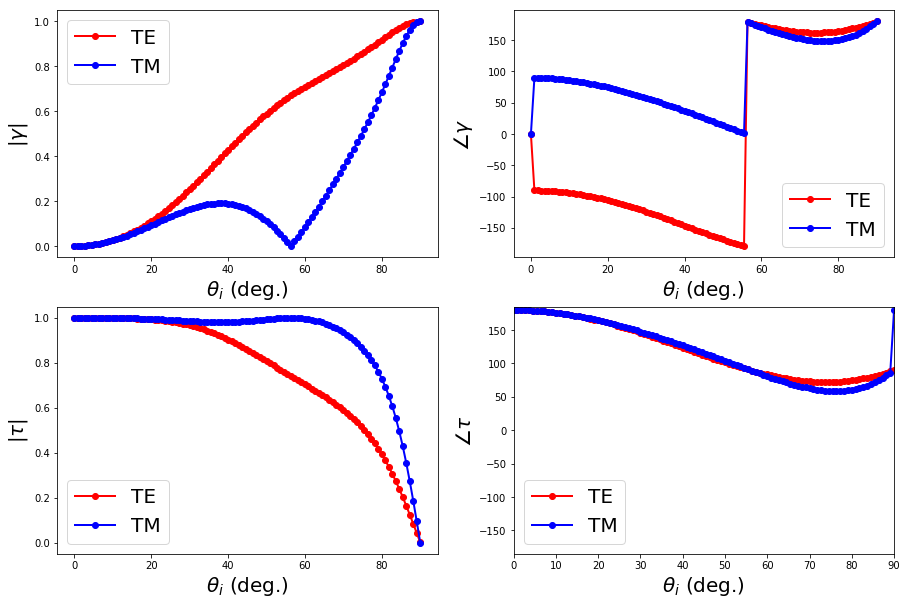

In [29]:
## plot data
fig, axes = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [15, 10]

axes[0,0].plot( theta1*180/np.pi, np.abs( r_s_E_TM ), 'ro-', linewidth=2.0)
axes[0,0].plot( theta1*180/np.pi, np.abs( r_p_H_TM ), 'bo-', linewidth=2.0)
axes[0,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,0].set_ylabel(r'$|\gamma|$', fontsize=20)
axes[0,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[0,1].plot( theta1*180/np.pi, np.angle( r_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[0,1].plot( theta1*180/np.pi, np.angle( r_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[0,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0,1].set_ylabel(r'$\angle\gamma$', fontsize=20)
axes[0,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -185, 185);

axes[1,0].plot( theta1*180/np.pi, np.abs( tau_s_E_TM ), 'ro-', linewidth=2.0)
axes[1,0].plot( theta1*180/np.pi, np.abs( tau_p_H_TM ), 'bo-', linewidth=2.0)
axes[1,0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,0].set_ylabel(r'$|\tau|$', fontsize=20)
axes[1,0].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90);

axes[1,1].plot( theta1*180/np.pi, np.angle( tau_s_E_TM, deg=True ), 'ro-', linewidth=2.0)
axes[1,1].plot( theta1*180/np.pi, np.angle( tau_p_H_TM, deg=True ), 'bo-', linewidth=2.0)
axes[1,1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1,1].set_ylabel(r'$\angle\tau$', fontsize=20)
axes[1,1].legend(['TE', 'TM'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -185, 185)

In [30]:
Ts, Rs, As = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
Tp, Rp, Ap = cal_TRA_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

(-10, 110)

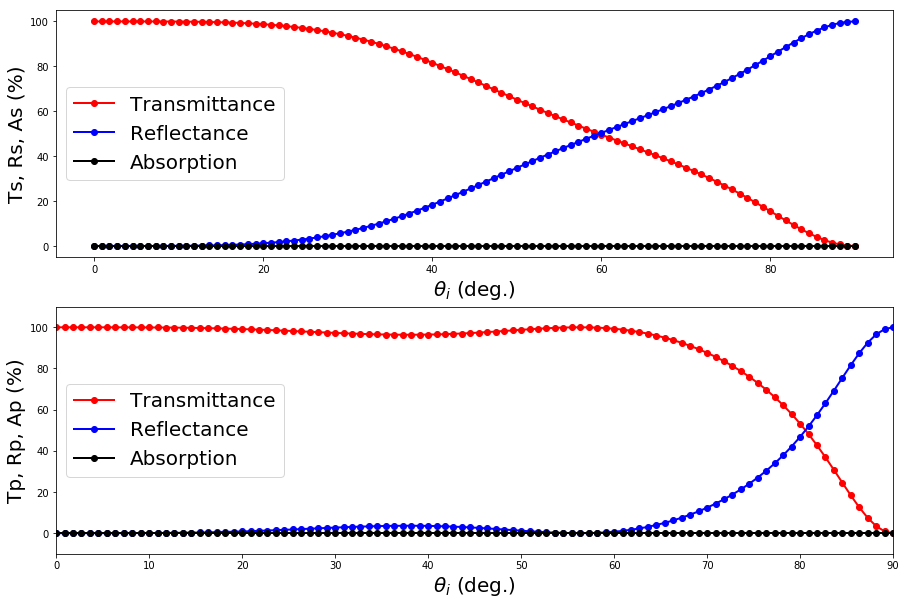

In [32]:
## plot data
fig, axes = plt.subplots(2,1)

axes[0].plot( theta1*180/np.pi, Ts * 100, 'ro-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, Rs * 100, 'bo-', linewidth=2.0)
axes[0].plot( theta1*180/np.pi, As * 100, 'ko-', linewidth=2.0)
axes[0].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[0].set_ylabel(r'Ts, Rs, As (%)', fontsize=20)
axes[0].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90);
plt.ylim( -10, 110);

axes[1].plot( theta1*180/np.pi, Tp * 100, 'ro-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Rp * 100, 'bo-', linewidth=2.0)
axes[1].plot( theta1*180/np.pi, Ap * 100, 'ko-', linewidth=2.0)
axes[1].set_xlabel(r'$\theta_i$ (deg.)', fontsize=20)
axes[1].set_ylabel(r'Tp, Rp, Ap (%)', fontsize=20)
axes[1].legend(['Transmittance', 'Reflectance', 'Absorption'], fontsize=20)
plt.xlim( 0, 90)
plt.ylim( -10, 110)

In [33]:
theta1 = np.array( [0, 30, 60], dtype=np.float )/180*np.pi
kx = k1 * np.sin(theta1)
ky = np.zeros( kx.shape )
z_list = np.linspace(-20, 1000, 1000)
Ep_zlist, En_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TE', Fp = 1.0)
Hp_zlist, Hn_zlist, LayerIndex, k_list, kz_list = cal_field_z( kx, ky, z_list, thickness_list, ko, er_list , mode='TM', Fp = 1.0)

tau_s_E_TM, r_s_E_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TE')
tau_p_H_TM, r_p_H_TM, k_list, kz_list = cal_r_tau_from_structure( kx, ky, thickness_list, ko, er_list, mode='TM')

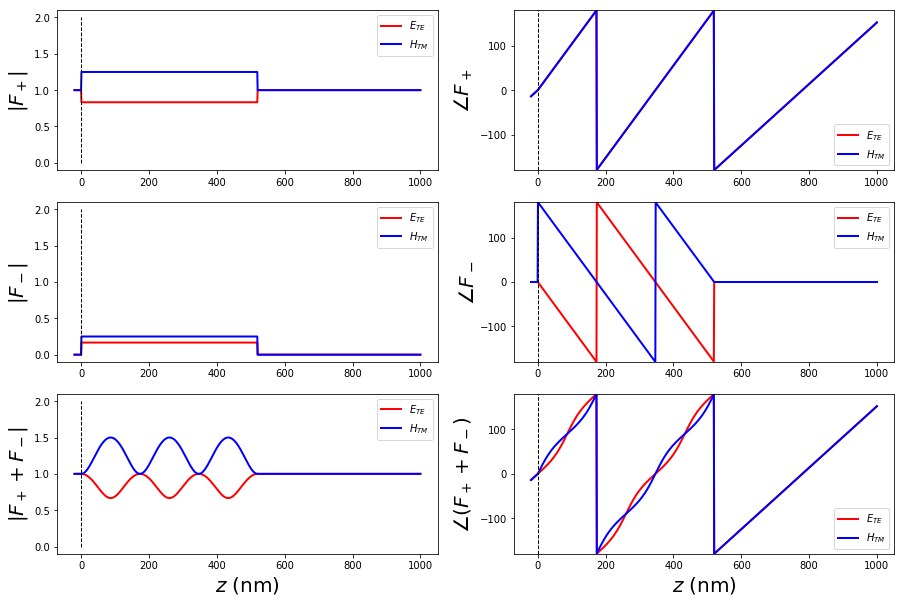

In [34]:
# incidence angle = 0
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=0)

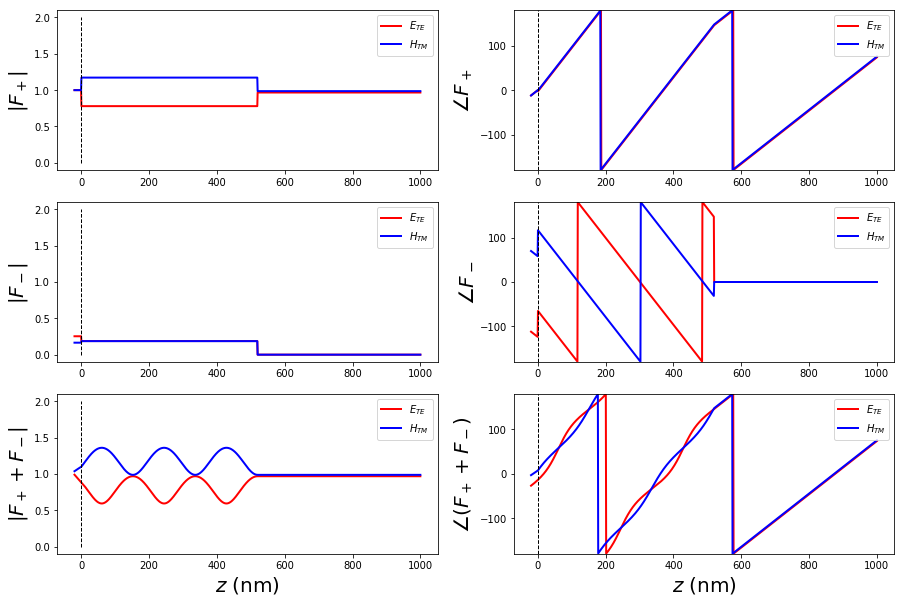

In [35]:
# incidence angle = 30
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=1)

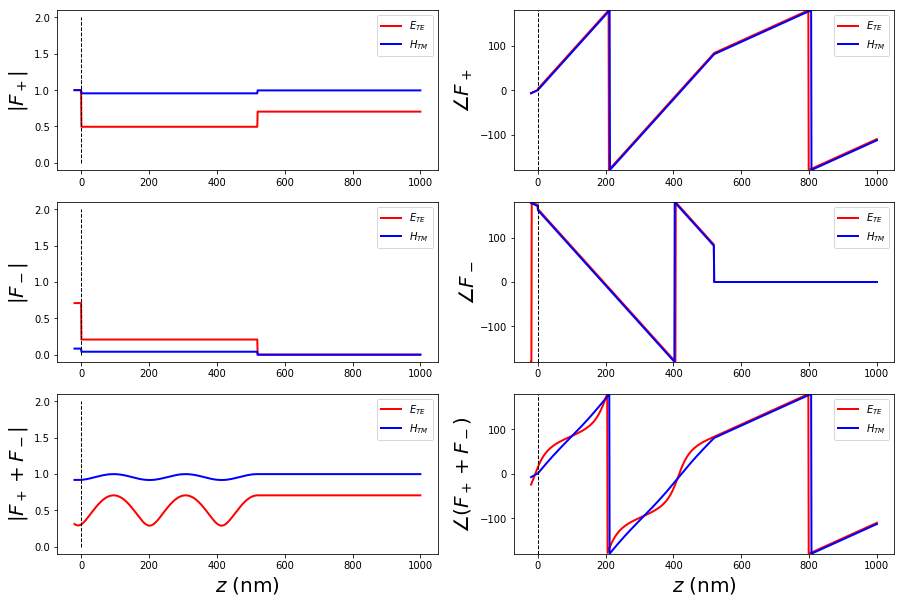

In [36]:
# incidence angle = 60
plot_fun(Ep_zlist, En_zlist, Hp_zlist, Hn_zlist, z_list, kxIdx=2)